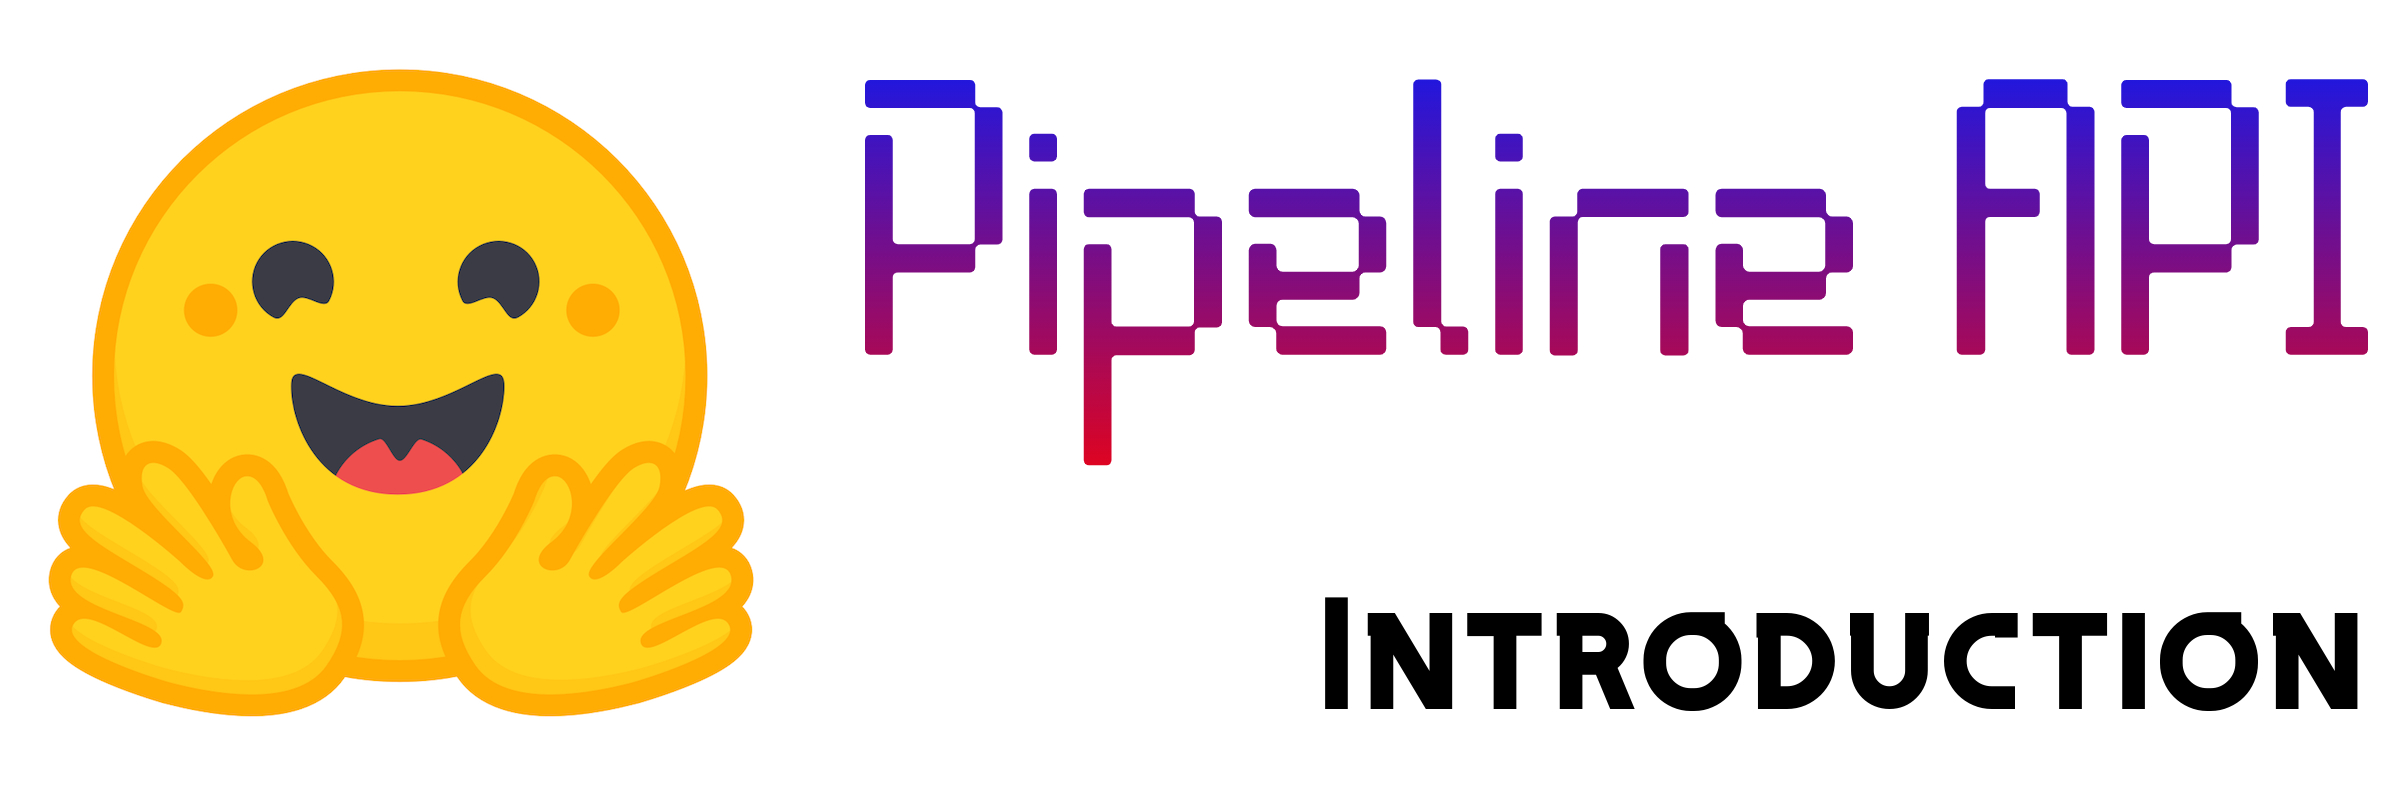

# A Gentle Introduction to the Hugging Face API

#### *by [Ritobrata Ghosh](https://ghosh-r.github.io)*

# Introduction

Natural Language Processing is a fast-advancing field. And it is also one of the fields that require a huge amount of computational resources to make important progress. And although breakthroughs are openly announced, and papers are released in free-to-access repositories such as [ar$\chi$iv](https://arxiv.org/), Open Review, Papers with Code, etc., and despite (sometimes) having the code freely available on GitHub, using those language models is not something widely accessible and easy.

Let me provide more context. BERT is a state-of-the-art encoder language model. It takes days to train the model from the ground up even when using very powerful GPUs that only a few entities have access to. In 2019, NVIDIA [used](https://nvidianews.nvidia.com/news/nvidia-achieves-breakthroughs-in-language-understandingto-enable-real-time-conversational-ai) $ 1472 $ NVIDIA V100 GPUs to train BERT from scratch in $ 53 $ minutes. Yes, $ 1,472 $!

One estimate [puts](https://twitter.com/eturner303/status/1266264358771757057?s=20) the cost of training GPT-3, a $ 175 $ billion parameter model, for a single training run at \$12 Million USD.

And such language models are released every now and then. How do you use these powerful language models for your task?

Here Hugging Face comes to the scene. They aim to solve this problem by providing pre-trained models, and simple API so that you can use them, fine-tune them, and use the API in your applications.

In this Notebook, my goal is to introduce the Hugging Face `pipeline` API to accomplish very interesting tasks by utilizing powerful pre-trained models present in the models hub of Hugging Face.

> What this Notebook is **NOT**:
> * An exhaustive list of all `pipeline` items or a list of all possible parameters in `pipeline` objects
> * An in-depth dive into the inner-workings of the API
> * An introduction to the models and the NLP behind the tasks accomplished by the `pipeline`s

To follow through this Notebook, you need not have any prior knowledge of Natural Language Processing. I, however, assume minor prior experience in writing Python code.
___

In this Notebook, I will go over, describe, and provide examples for the following tasks using Hugging Face `pipeline`-

* Sentiment Analysis
* Zero-Shot Classification
* Text Generation
* Mask-Filling
* Named Entity Recognition
* Question Answering
* Summarization
* Translation

___

# Installing and Importing

In [1]:
! pip install transformers[sentencepiece] > /dev/null

If you have not seen a `pip` install with a square bracket in it before, don't worry. It means that you are installing the `transformers` package with extra support added for the `sentencepiece` package. You can find out more about square parentheses installs in `pip` [here](https://stackoverflow.com/questions/46775346/what-do-square-brackets-mean-in-pip-install).

In [2]:
from transformers import pipeline

We will use the utilities available in the `pipeline` namespace in the `transformers` library.

___

# Sentiment Analysis

Before I begin going through the specific `pipeline`s, let me tell you something beforehand that you will find yourself. Hugging Face API is very intuitive. When you want to use a `pipeline`, you have to instantiate an object, then you pass data to that object to get result. Very simple! You are soon to see what I mean.

In [3]:
classifier_sentiment = pipeline("sentiment-analysis")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

That's it. You call the `pipeline()` method with the task you want to accomplish as an argument. And you assign a name to it. You are done now. You can now begin to use the object as a function to achieve what you want. Let's see an example-

In [4]:
classifier_sentiment("I fully understand what you are saying.")

[{'label': 'POSITIVE', 'score': 0.9996806383132935}]

See, it returns a dictionary contained in a list that has two items, `label` and `score`. The `label` part tells us its prediction, and the `score` tells us its confidence score.


> *As an aside, I think they are structured this way because this structure is easily compatible with `.json` and similar filetypes which are very common in APIs.*


Let's see another example.

In [5]:
classifier_sentiment("I absolutely hate pineapple in pizzas. It's an abomination.")

[{'label': 'NEGATIVE', 'score': 0.9969514012336731}]

See, how the classifier is aware of my emotion about pineapple pizzas? 🙃

___

# Zero Shot Classification

When you want to classify something using Deep Learning, in many cases you need to train it with labeled examples. This approach is known as Supervised Learning. Even when leveraging transfer learning, you need to train your model with quite a few labeled examples in the domain of your choice. Zero-shot classification is different than that. In this, you use a pre-trained model to classify a given string and some labels of your choice. The model returns you the confidence score for each model.

Let me show you how this works. First, you instantiate an object and assign it a name just like you did in the case of the Sentiment Analysis pipeline.

In [6]:
classifier_zero_shot = pipeline("zero-shot-classification")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Then you pass a string, along with the labels of your choice to test how well they correspond to your sentence.

In [7]:
classifier_zero_shot(
    "You can grow as a Programmer if you learn about the functional paradigm",
    candidate_labels=["profession", "politics", "education"])

{'sequence': 'You can grow as a Programmer if you learn about the functional paradigm',
 'labels': ['profession', 'education', 'politics'],
 'scores': [0.7289214134216309, 0.2582126557826996, 0.012865954078733921]}

See, the given sentence is about a profession, and the model tells you that. And it knows that it is much more related to education than politics.

Essentially, when you are doing Zero-Shot Classification, you are supplying a string to the `pipeline`, and also labels. The pipeline returns how accurate **those labels are**.

___

# Text Generation

Before I heard about Deep Learning, I heard about Natural Language Processing, because I heard that you can generate text with it! This is the most exciting part of NLP to me, personally.

As the name suggests, this `pipeline` lets you generate text. It just needs you to supply a prompt, a text that will determine what the generated text will be. Let me show you how.

In [8]:
generator = pipeline("text-generation")

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [9]:
generator("We all like to spend time with dogs")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "We all like to spend time with dogs, but when you have a big dog in our lives — even a lot of them — people like watching a dog bite. And you've given the puppy an excellent opportunity to explore all these wonderful creatures and try"}]

See what I mean! Even with zero training, it can create logically coherent text that is even interesting to read. Robots will take over writers soon 🤖!


You can control the maximum length of the output of the `pipeline`, and even ask for multiple possible outputs, like so-

In [10]:
generator("The stars in the night sky are beautiful",
          max_length=30,
          max_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "The stars in the night sky are beautiful. They're all beautiful and well suited. They're gorgeous because they are the most beautiful stars. You can"}]

> *Whoa, it's poetic!*

We can accomplish more interesting things with transfer learning. But that is a story for another day.

___

# Mask Filling

In this pipeline, if there is a word that you hide and supply the string with the hidden word, the `pipeline` will predict that word. This is like magic!

In [11]:
unmasker = pipeline("fill-mask")

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

You pass the sentence with the masked word, and it will predict it. You can choose the number of predictions you want to see. You just have to pass a value to the `top_k` parameter.

In [12]:
unmasker(
    "It is so hot in here, that you can barely go <mask>.",
    top_k=3)

[{'sequence': 'It is so hot in here, that you can barely go outside.',
  'score': 0.7310199737548828,
  'token': 751,
  'token_str': ' outside'},
 {'sequence': 'It is so hot in here, that you can barely go inside.',
  'score': 0.1197102889418602,
  'token': 1025,
  'token_str': ' inside'},
 {'sequence': 'It is so hot in here, that you can barely go downstairs.',
  'score': 0.027116093784570694,
  'token': 28239,
  'token_str': ' downstairs'}]

In [13]:
unmasker(
    "I am quite <mask> and so I decided not to go.",
    top_k=2)

[{'sequence': 'I am quite tired and so I decided not to go.',
  'score': 0.1884784996509552,
  'token': 7428,
  'token_str': ' tired'},
 {'sequence': 'I am quite bored and so I decided not to go.',
  'score': 0.13763289153575897,
  'token': 23809,
  'token_str': ' bored'}]

It can predict the words quite well. Just remember to mask the word using `<mask>`.
___

# Named Entity Recognition

This `pipeline` recognizes the proper nouns in your sentence. And it also classifies them. Let's see an example.

In [14]:
ner = pipeline("ner", grouped_entities=True)

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

The `grouped_entities` parameter just ensures that the `pipeline` can recognize the names that have more than one word, like, you know, Chocolate Factory.

In [15]:
ner("My name is Rito, and I am a Computer Vision Consultant based in Kolkata.")

[{'entity_group': 'PER',
  'score': 0.9974141120910645,
  'word': 'Rito',
  'start': 11,
  'end': 15},
 {'entity_group': 'ORG',
  'score': 0.8904100060462952,
  'word': 'Computer Vision Consultant',
  'start': 28,
  'end': 54},
 {'entity_group': 'LOC',
  'score': 0.9972316026687622,
  'word': 'Kolkata',
  'start': 64,
  'end': 71}]

See how it recognizes a person, his profession, and location on its own, and also labels them as "PER", "ORG", and "LOC" (meaning location), respectively.

___

# Question Answering

This pipeline provides you with an answer to a question you ask from the context that you provide.

In [16]:
question_answerer = pipeline("question-answering")

Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [17]:
question_answerer(
    question="Who became a desciple of the Buddha?",
    context="Empress Khema, the wife of Emperor Bimbisara, became a desciple of the Buddha."
)

{'score': 0.959225594997406, 'start': 0, 'end': 13, 'answer': 'Empress Khema'}

It can answer multiple questions from the same prompt.

In [18]:
question_answerer(
    question="Who was the husband of Empress Khema?",
    context="Empress Khema, the wife of Emperor Bimbisara, became a desciple of the Buddha."
)

{'score': 0.5506021976470947, 'start': 35, 'end': 44, 'answer': 'Bimbisara'}

___

# Summarization

This is one of the most practical tasks that has existed for a long time. Deep Learning really changes the landscape of the task.

Let's see it in action.

In [19]:
summarizer = pipeline("summarization")

Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Let's summarize a piece of text from a [blog post](https://blog.royalsloth.eu/posts/i-wish-i-could-write-this-well/) I recently read.

In [20]:
summarizer(
    """
    “I really connected with your writing. You are such a talented writer. I wish I could write this well.”
    Ah, the praises of the internet comments can really make your day. “I laughed out loud while reading this,”
    said another. Yeah me too, except I was the one writing those sentences.

    I am sure my high school English teacher would have something entirely different to say about that.
    “Maybe writing is not for you,” would probably be her words. Maybe not in a such direct down-putting tone,
    since teachers are in general not supposed to discourage people from trying, but you get the idea.

    Which got me thinking, why do we refer to someone as talented when we know that they weren’t born with this
    skill? You weren’t born with the ability to speak, write stories or make computer programs. It’s a skill
    that you have have learned over time, mostly due to spending a lot of hours in that particular field. Sure,
    natural capabilities matter when you are competing with the best in the world, but for most people
    competing with the best is not a part of their daily job.

    I started learning English in primary school. I had an English teacher that tried her best to teach English,
    except her best way of teaching was often quite the opposite of what is best for learning a foreign language.
    She followed the iron practices that were recommended by the board of education, but after years of following
    those practices, my ability to write in English came down to jotting down a few lousy sentences and eventually
    I ran out steam. The only thing that I can remember from those practices, was filling in thick workbooks full
    of exercises. And papers. So many exercise papers still warm from the printing.
    """
)

[{'summary_text': ' You weren’t born with the ability to speak, write stories or make computer programs . It’s a skill that you have have learned over time, mostly due to spending a lot of hours in that particular field . The only thing that I can remember from those practices, was filling in thick workbooks full of exercises .'}]

Now, that's something! The efficacy of the summarizer really shocked me. It does this task so well.

___

# Translation

The translation `pipeline` translates a piece of text from one language to another. It also lets you choose the language model of your choice.

First, let's translate a text from English to German. I will use the [`Helsinki-NLP/opus-mt-en-de`](https://huggingface.co/Helsinki-NLP/opus-mt-en-de) model for this task.

In [21]:
translator_de = pipeline("translation", model="Helsinki-NLP/opus-mt-en-de")

Downloading:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/298M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/768k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/797k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

In [22]:
translator_de("I am Rito, and I am looking for a taxi to reach the symposium.")

[{'translation_text': 'Ich bin Rito, und ich suche ein Taxi, um das Symposium zu erreichen.'}]

Note that you are not explicitly telling the model about the language of the input language or the output language. A language model is only trained for translating from one language to another. It cannot translate other languages. If you want to translate from German to English, you'd have to use another model from the model hub. You can find all the translation models [here](https://huggingface.co/models?pipeline_tag=translation).

The cool thing is that Hugging Face is not limited to Romance languages or European languages in general. Let me show you by translating a piece of text from Bengali.

In [23]:
translator_bn = pipeline("translation", model="Helsinki-NLP/opus-mt-bn-en")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/309M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.25M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

In [24]:
translator_bn("গতকাল রাত থেকে খুব বৃষ্টি হয়েছে, চারিদিক জলে ভেসে গেছে।")

[{'translation_text': "It's been raining since yesterday night, it's been flooded."}]

___

# Conclusion

I have shown you several pipeline APIs and what they do and how they work.

Here are the suggested next steps-

* **Experiment.** Play with the `pipeline`s by yourself, try different things with different parameters, run inference on examples of your own, test edge cases, run wild with it. I believe that is the best way to learn.
* **Do Projects.** Use the knowledge you gained here in simple projects. We only learn by doing.
* **Hugging Face Course.** Hugging Face has recently released a [free course](https://huggingface.co/course/chapter1) where they teach you about Transformers and their library ecosystem. It is a good next step.
* **Explore.** Explore the Hugging Face [website](https://huggingface.co/), learn more about their APIs, Services, pre-trained models, and many more things it has to offer.

___

If you notice any error, mistake, or typo, please feel free to let me know. If something is not clear, please let me know that as well. I will do my best to correct it and will credit you here.

Let me know if you have any questions at all.

___

You can find me on Twitter (@AllesistKode) and connect with me on [LinkedIn](https://www.linkedin.com/in/ritobrata-ghosh/). I blog on my [personal website](https://ghosh-r.github.io) as well.